<a href="https://colab.research.google.com/github/mromar2022/Abdo_Omar_1820413_MV_Midterm/blob/main/Quiz_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 
                      **Quiz 2**
---


** Name : Abdo Omar Akram Omar **


---

**Martic NO.: 1820413**




In [2]:
#Importing libary 
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#mount google drive to colab environment
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [4]:
#path to lego.png
path = "/content/gdrive/MyDrive/MV/quiz 2 /lego1.png"

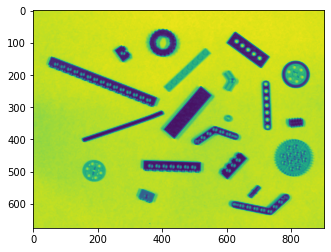

In [5]:
#Open image using openCV2 in grayscale
lego = cv2.imread(path) #read the image
lego_gray = cv2.cvtColor(lego, cv2.COLOR_BGR2GRAY) #convert to grayscale

#display the image
plt.imshow(lego)
plt.imshow(lego_gray)
plt.show()

Threshold: 175.0
objects in the image using dilation=  20
objects in the image using closing =  20


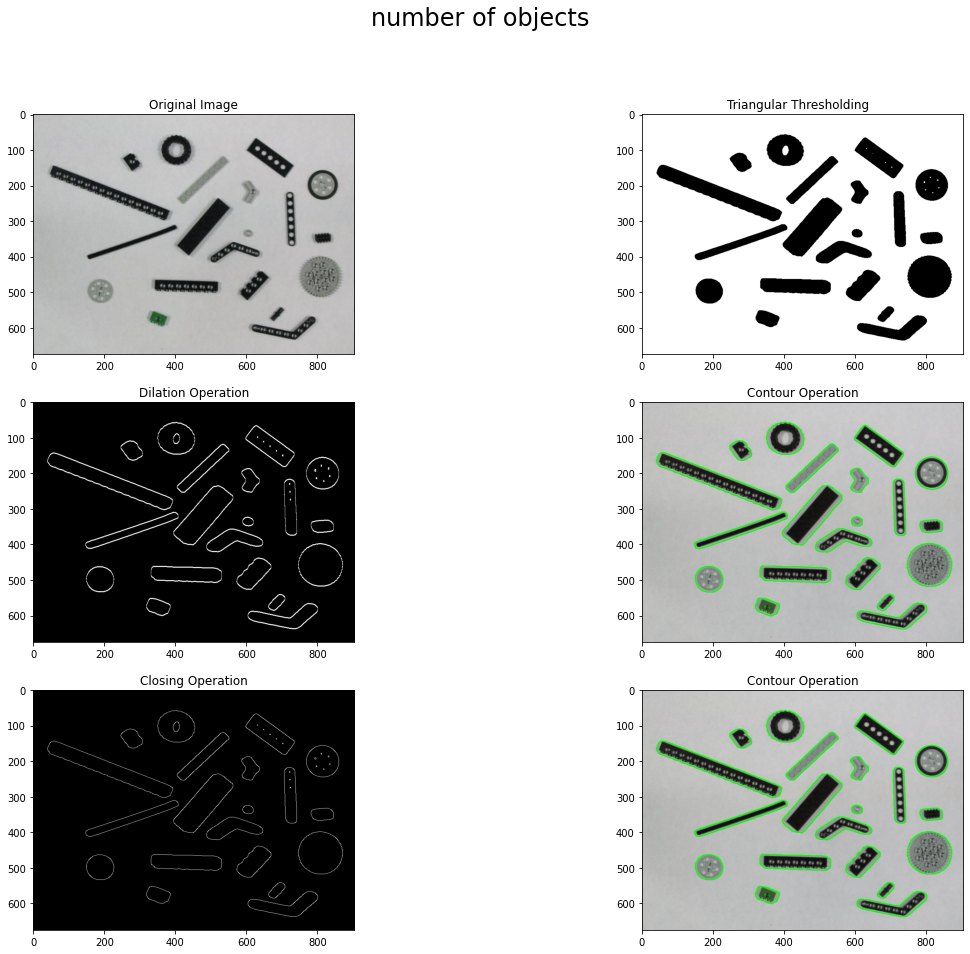

In [6]:
method = [cv2.THRESH_TRIANGLE] 
names = ['number of objects']

def thresh(img_path, method, index):
  #Open image using openCV2 in grayscale
    img = cv2.imread(path) #read the image
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY) #convert to grayscale
    blurred = cv2.GaussianBlur(gray, (9, 9), 2)# Blurring the image 

    ret, img_masked = cv2.threshold(blurred, 150, 255, method) #creating a mask/ binarize the image from range 150-255
    print(f"Threshold: {ret}")

    canny = cv2.Canny(img_masked, 0, ret, 3 )

    
    dilation = cv2.dilate(canny , (2,2), iterations=2) #a 2x2 square shape that will be applied to our image
    closing = cv2.morphologyEx(canny, cv2.MORPH_CLOSE,(4,4)) ##reduce the black dots on the white image so we can differentiate each lego
    #removes any noise within the objects (dilation, erosion)
    
  #Find contours of the image from dilation
    (cnt, hierarchy) = cv2.findContours(dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
    print("objects in the image using dilation= ", len(cnt)) #create text for the value

   #Find contours of the image from closing 
    (cnt1, hierarchy) = cv2.findContours(closing.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rgb1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #convert to grayscale
    cv2.drawContours(rgb1, cnt1, -1, (0, 255, 0), 2)
    print("objects in the image using closing = ", len(cnt1)) #create text for the value
    text1= "original image"

  #Plot the images
    fig, ax = plt.subplots(3, 2, figsize=(20, 15))
    fig.suptitle(names[index], fontsize=24)
    ax[0,0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),
    ax[0,0].title.set_text('Original Image')
    ax[0,1].imshow(cv2.cvtColor(img_masked, cv2.COLOR_BGR2RGB)), 
    ax[0,1].title.set_text('Triangular Thresholding  ')
    ax[1,0].imshow(dilation, cmap='gray'), 
    ax[1,0].title.set_text('Dilation Operation')
    ax[1,1].imshow(cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)), 
    ax[1,1].title.set_text('Contour Operation')
    ax[2,0].imshow(closing, cmap='gray'), 
    ax[2,0].title.set_text('Closing Operation')
    ax[2,1].imshow(cv2.cvtColor(rgb1, cv2.COLOR_BGR2RGB)), 
    ax[2,1].title.set_text('Contour Operation')
    
    

for index, method in enumerate(method):
    thresh('lego.png', method, index)

Briefly describe how the algorithm works

1.   firstly we need to add all the libraries that we need to use 
2.   we need to import the picture from our local drive in our case here is google deive


3.   we convert the picture to garyscale if it's not in a grayscale 

4.  adding mask to bbinarize the image 

5.   we set the threshold to be from 150-255 to  make the image in black and white

6.   Removes any Noise in the Objects
Similar to above, however we are closing (Dilation then Erosion). This removes any noise within the object.
    Erosion - Slides the Kernel through the image. If all the pixels underneath the kernel is 1 (white) it will be eroded set to black.  
    Dilation - Slides the Kernel through the image. A pixel is white if there is at least one pixel under the kernel that is 1.

7.   Counts the External Contour Lines
    Only the Extreme Outer Contours are counted and each of its boundary points are saved to an Contour Python Numpy Array.


8.   Counts the External Contour Lines


9.   Outputs the Counted Number to the User


    

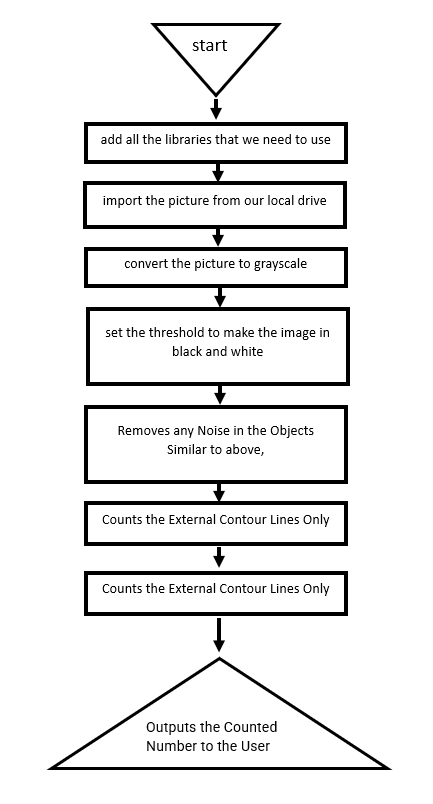